In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
gender_submission = pd.read_csv("/content/drive/MyDrive/titanic/gender_submission.csv")
train = pd.read_csv("/content/drive/MyDrive/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/titanic/test.csv")

print(train.shape, test.shape) # train은 label 포함 12열, test는 label이 없으니 11열로 구성

(891, 12) (418, 11)


In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
train.isnull().sum() # train 결측치 Age 177, Cabin 687, Embarked 2
test.isnull().sum() # test 결측치 Age 86, Fare 1, Cabin 327

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Name에서 Title(호칭)을 따오자. 정규표현식으로 따온 후, 빈도를 파악한다.
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand = False)
test['Title'] =   test['Name'].str.extract('([A-Za-z]+)\.', expand = False)

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
train['Title'] = train['Title'].replace(['Mlle','Ms'], 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace(['Dr','Rev','Major','Jonkheer','Countess','Capt','Sir','Lady','Don','Col'],'Others')
train['Title'].value_counts()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
family           0
ismale           0
title            0
dtype: int64

In [ ]:
test['Title'] = test['Title'].replace(['Mlle','Ms'], 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace(['Dr','Rev','Major','Jonkheer','Countess','Capt','Sir','Lady','Don','Col'],'Others')
test['Title'].value_counts()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,ismale,title,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,0,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,0.0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,0.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,0,2.0,2


In [ ]:
train['family'] = 1 + train['SibSp'] + train['Parch'] #  가족 구성원 수
test['family'] = 1 + test['SibSp'] + test['Parch'] #  가족 구성원 수

In [ ]:
train['ismale'] = train['Sex'].map({'female':0, 'male':1}).astype(int) # 성별 숫자 매핑
test['ismale'] = test['Sex'].map({'female':0, 'male':1}).astype(int) # 성별 숫자 매핑

train['title'] = train['Title'].map({'Mr':0,'Miss':1,"Mrs":2,'Master':4,'Others':5}).astype(float)
test['title'] = test['Title'].map({'Mr':0,'Miss':1,"Mrs":2,'Master':4,'Others':5}).astype(float)


In [ ]:
train['Embarked'].fillna('S',inplace=True)
train['embarked']= train['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)
test['Embarked'].fillna('S',inplace=True)
test['embarked']= test['Embarked'].map({'C':0,'Q':1,'S':2}).astype(int)

In [ ]:
def bar_chart(feature): # 피처별 생존 여부 시각화
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

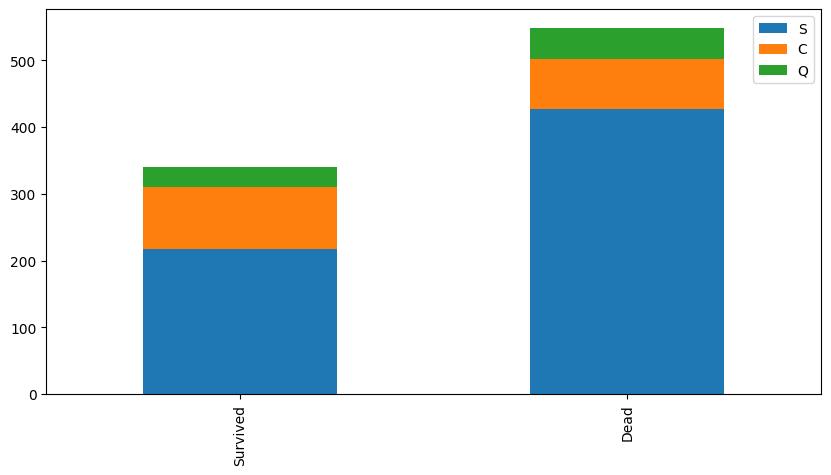

In [ ]:
bar_chart('Embarked')

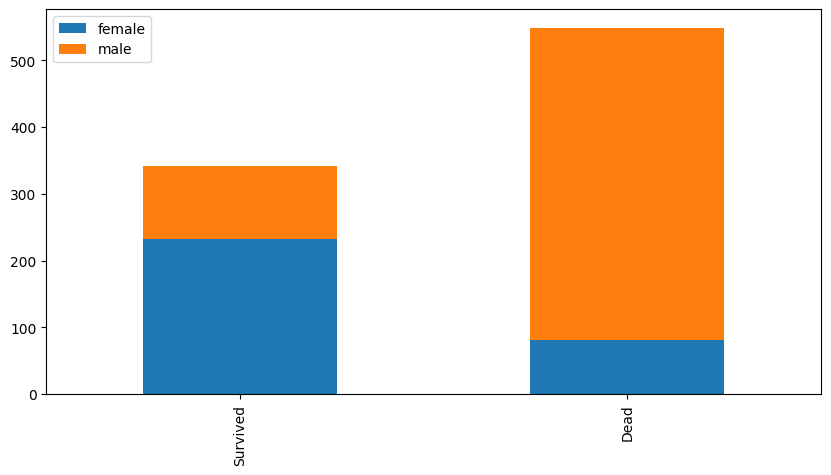

In [ ]:
bar_chart('Sex')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,ismale,title,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,1,0.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,2.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,0.0,2


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,family,ismale,title,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,0.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,0,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,0.0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,0.0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,0,2.0,2


In [ ]:
label_column = ['Survived']
feature_columns = ['Pclass','Age','Fare','embarked','title','family','ismale']

train_X = train[feature_columns]
test_X = test[feature_columns]
train_Y = train[label_column]
print(train_X.shape, test_X.shape)

(891, 7) (418, 7)


,Pclass,Age,Fare,embarked,title,family,ismale
0,3,22.0,7.2500,2,0.0,2,1
1,1,38.0,71.2833,0,2.0,2,0
2,3,26.0,7.9250,2,1.0,1,0
3,1,35.0,53.1000,2,2.0,2,0
4,3,35.0,8.0500,2,0.0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_train_X = sc.fit_transform(train_X)
scaled_train_X = pd.DataFrame(scaled_train_X, columns=feature_columns)
scaled_train_X.head()

,Pclass,Age,Fare,embarked,title,family,ismale
0,0.827377,-0.530377,-0.502445,0.585954,-0.652821,0.059160,0.737695
1,-1.566107,0.571831,0.786845,-1.942303,0.981065,0.059160,-1.355574
2,0.827377,-0.254825,-0.488854,0.585954,0.164122,-0.560975,-1.355574
3,-1.566107,0.365167,0.420730,0.585954,0.981065,0.059160,-1.355574
4,0.827377,0.365167,-0.486337,0.585954,-0.652821,-0.560975,0.737695


In [ ]:
scaled_test_X = sc.fit_transform(test_X)
scaled_test_X = pd.DataFrame(scaled_test_X, columns=feature_columns)
scaled_test_X.head()

,Pclass,Age,Fare,embarked,title,family,ismale
0,0.873482,0.298549,-0.497811,-0.470915,-0.684788,-0.553443,0.755929
1,0.873482,1.181328,-0.512660,0.700767,1.035432,0.105643,-1.322876
2,-0.315819,2.240662,-0.464532,-0.470915,-0.684788,-0.553443,0.755929
3,0.873482,-0.231118,-0.482888,0.700767,-0.684788,-0.553443,0.755929
4,0.873482,-0.584229,-0.417971,0.700767,1.035432,0.764728,-1.322876


In [ ]:
scaled_train_X = scaled_train_X.to_numpy().astype('float32')
scaled_test_X = scaled_test_X.to_numpy().astype('float32')
train_Y = train_Y.to_numpy().astype('float32')
print(train_X.shape, test_X.shape, train_Y.shape)

(891, 7) (418, 7) (891, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

titanic_model = Sequential()

titanic_model.add(Dense(64,activation='sigmoid',input_shape=(scaled_train_X.shape[1],)))
titanic_model.add(Dropout(0.25))
titanic_model.add(Dense(2,activation='softmax'))


In [ ]:
titanic_model.compile(optimizer=SGD(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
final = titanic_model.fit(scaled_train_X, train_Y, epochs=200)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.6173
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6162
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6162
Epoch 11/200
28/28 [===================

In [ ]:
survived_predict = titanic_model.predict(test_X)
print(survived_predict.shape)

In [ ]:
survived_predict = np.argmax(survived_predict, axis=0)
gender_submission['Survived']=survived_predict
gender_submission.to_csv('Kaggle_Titanic_Competition.csv',index=False)